# Imports

In [1]:
import sys
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from rag_class import ParamsSelector

# Подготовка обучающих данных

Отберем случайным образом 30 записей

In [2]:
df = pd.read_pickle('../data/ru_rag_test_dataset.pkl')
df_30_samples = df.sample(n=30, random_state=42)

# Обучение

In [3]:
model_examples = {
    'llama-3.2-1b-instruct': None,
    'llama-3.2-3b-instruct': None,
    'llama-3.2-8b-instruct': None,
}

In [ ]:
for model in model_examples.keys():
    model_examples[model] = ParamsSelector(model, df_30_samples, 10)
    print(f'===== Test for: {model} =====')
    model_examples[model].start_optuna()

In [ ]:
model_examples['llama-3.2-1b-instruct'].study.best_params

{'encoder_name': 'cointegrated/LaBSE-en-ru',
 'chunk_size': 1854,
 'chunk_overlap': 180,
 'n_top_cos': 5,
 'max_new_tokens': 526,
 'temperature': 0.22985816265224213,
 'top_p': 0.438947579134705}

In [ ]:
model_examples['llama-3.2-3b-instruct'].study.best_params

{'encoder_name': 'cointegrated/LaBSE-en-ru',
 'chunk_size': 1614,
 'chunk_overlap': 165,
 'n_top_cos': 7,
 'max_new_tokens': 418,
 'temperature': 0.11036680092261839,
 'top_p': 0.3551261180983361}

In [ ]:
model_examples['llama-3.2-8b-instruct'].study.best_params

{'encoder_name': 'cointegrated/LaBSE-en-ru',
 'chunk_size': 758,
 'chunk_overlap': 145,
 'n_top_cos': 7,
 'max_new_tokens': 1248,
 'temperature': 0.5975645604976096,
 'top_p': 0.016978075604588798}

# Анализ результатов

In [21]:
data = {
    '1b': pd.read_pickle('results_for_llama-3.2-1b-instruct_30_trials.pkl'),
    '3b': pd.read_pickle('results_for_llama-3.2-3b-instruct_30_trials.pkl'),
    '8b': pd.read_pickle('results_for_llama-3.2-8b-instruct_30_trials.pkl'),
}

data['1b']['model'] = '1b'
data['3b']['model'] = '3b'
data['8b']['model'] = '8b'
all_results = pd.concat([data['1b'], data['3b'], data['8b']], axis=0)

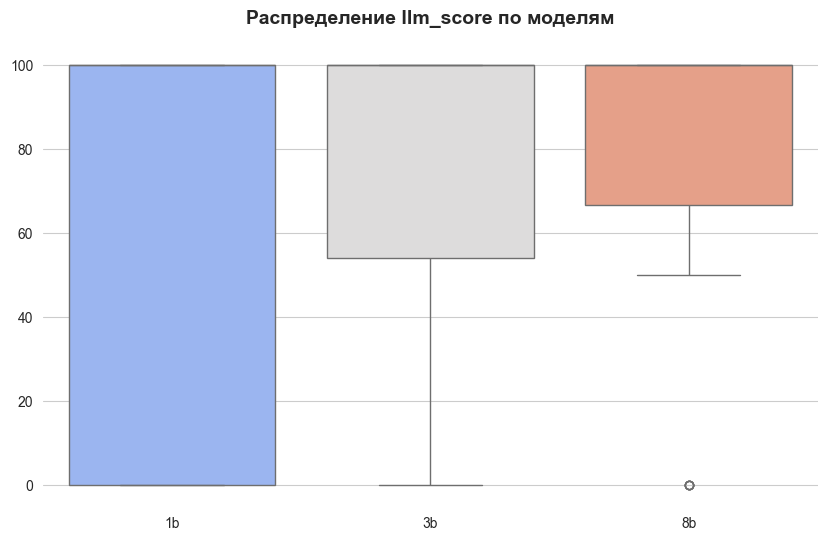

In [62]:
plt.figure(figsize=(10, 6))  
sns.set_style("whitegrid")

ax = sns.boxplot(
    data=all_results, 
    y='llm_score', 
    x='model', 
    palette='coolwarm',
)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("Распределение llm_score по моделям", fontsize=14, fontweight='bold', pad=15)

sns.despine(left=True, bottom=True)

plt.show()


На этом графике мы видим, что для модели 1b вполне нормальны значения от 0 и 100

Для модели 3b - 0 является не самым частым случаем, поскольку IQR между 55 и 100, но и выбросом 0 не является

Для модели 8b - 0 является выбросом и в целом мы видим, что у модели меньше диапазон значений (от нижней границы к верхней) и IQR между 65 и 100

Вся эта информация говорит нам о том, что, чем больше весов у модели, тем **вернее** ответы

-----------------------------------------

Однако следует посмотреть почему модели получали нуль

In [50]:
data['1b'][data['1b']['llm_score'] == 0]

,Вопрос,Правильный ответ,Контекст,Файл,top_files,top_chunks,Ответ,file_score,context_score,llm_score,model
20,Кто является возбудителем сонной болезни?,Трипаносома,"Африканский трипаносомоз, или сонная болезнь —...",5135818.txt,"[33616.txt, 827.txt, 5963191.txt, 5135818.txt]","[Африканский трипаносомоз, или сонная болезнь,...",Трипаносомы Trypanosoma brucei.,1,98,0.0,1b
21,Кто является матерью Децла?,Ирина Анатольевна Толмацкая,Родился 22 июля 1983 года в Москве. Отец — Але...,249892.txt,"[249892.txt, 6416631.txt, 3045240.txt]",[== Сюжет ==\nКнига прослеживает жизненный пут...,Катлина.,1,97,0.0,1b
22,Из какой династии был Хлодвиг?,Меровинги,"Хлодвиг I (Кловис, Хлодовех; около 466 — 27 но...",35105.txt,[35105.txt],"[Хлодвиг I (также Кловис, Хлодовех; около 466 ...",Меровингов.,1,97,0.0,1b
23,В какой стране находится храм Изумрудного Будды,Таиланд,Изумрудный Будда — выполненная из жадеита и ук...,2442660.txt,"[2442660.txt, 3045240.txt, 41043.txt, 35105.txt]","[Шевардинский редут на Бородинском поле, реста...",Бангкок.,1,96,0.0,1b
24,Какой англосаксонский король приказал бросить ...,Элла II Нортумбрийский,"В 865 году, во время экспедиции в Британию, ко...",921153.txt,"[33616.txt, 921153.txt, 35105.txt]",[После этого Лодброк отступил и нашёл приют у ...,Хлодвиг.,1,92,0.0,1b
25,Кто является первым обладателем награды «Золот...,Стэнли Мэтьюз,«Золотой мяч» (фр. Ballon d'Or) — ежегодная фу...,55112.txt,[55112.txt],[== История ==\nПервым обладателем «Золотого м...,Роналдо.,1,67,0.0,1b
26,Какая по счету планета от Солнца Юпитер?,5,Планеты можно поделить на два основных класса:...,827.txt,[827.txt],[Юпи́тер — крупнейшая планета Солнечной систем...,Юпитер.,1,31,0.0,1b
27,Сколько лет длилось восстание Спартака?,2,В СССР восстание Спартака рассматривалось как ...,2431404.txt,[2431404.txt],[== Планы сторон ==\n\n\n=== Цели и фракции во...,74-71 год до н. э.,1,29,0.0,1b
28,На каком языке Шарль де Костер написал «Легенд...,Французском,«Легенда» активно переводилась с французского ...,6416631.txt,[6416631.txt],"[«Легенда о Тиле Уленшпигеле и Ламме Гудзаке, ...",фр.,1,19,0.0,1b
29,"Кто сыграл Бормана в народном телесериале ""Сем...",Визбор,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"[35547.txt, 223268.txt, 3045240.txt, 41043.txt]","[Шевардинский редут на Бородинском поле, реста...",Мартин Борман.,0,0,0.0,1b


Видим, что оценка модели справделивая. Да, есть некоторые неточности. К примеру "Меровинги" и "Меровингов", но общую картину это не портит, поскольку овтеты действительно неверные

In [51]:
data['3b'][data['3b']['llm_score'] == 0]

,Вопрос,Правильный ответ,Контекст,Файл,top_files,top_chunks,Ответ,file_score,context_score,llm_score,model
24,Сколько лет длилось восстание Спартака?,2,В СССР восстание Спартака рассматривалось как ...,2431404.txt,[2431404.txt],[== Историография ==\nВосстание Спартака снача...,"Восстание Спартака длилось 3 года, с 135 по 13...",1,100,0.0,3b
25,Кто является возбудителем сонной болезни?,Трипаносома,"Африканский трипаносомоз, или сонная болезнь —...",5135818.txt,"[5963191.txt, 3045240.txt, 33616.txt, 5135818....","[Африканский трипаносомоз, или сонная болезнь,...","Трипаносомы Trypanosoma brucei, specifically д...",1,98,0.0,3b
26,Из какой династии был Хлодвиг?,Меровинги,"Хлодвиг I (Кловис, Хлодовех; около 466 — 27 но...",35105.txt,[35105.txt],"[Хлодвиг I (также Кловис, Хлодовех; около 466 ...",Хлодвиг был из династии Меровингов.,1,97,0.0,3b
27,"Кто сыграл Бормана в народном телесериале ""Сем...",Визбор,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"[223268.txt, 158957.txt, 1507890.txt, 35547.tx...","[«Non, je ne regrette rien» («Я ни о чём не жа...","В народном телесериале ""Семнадцать мгновений в...",1,43,0.0,3b
28,Какая по счету планета от Солнца Юпитер?,5,Планеты можно поделить на два основных класса:...,827.txt,[827.txt],[Юпи́тер — крупнейшая планета Солнечной систем...,Пятая по удалённости от Солнца.,1,32,0.0,3b
29,На каком языке Шарль де Костер написал «Легенд...,Французском,«Легенда» активно переводилась с французского ...,6416631.txt,"[223268.txt, 6416631.txt]","[«Легенда о Тиле Уленшпигеле и Ламме Гудзаке, ...",Французский.,1,19,0.0,3b


Тут мы видим несправделивую оценку. Если бы для оценки мы использовали LLM модель, то оценки были бы выше

In [52]:
data['8b'][data['8b']['llm_score'] == 0]

,Вопрос,Правильный ответ,Контекст,Файл,top_files,top_chunks,Ответ,file_score,context_score,llm_score,model
25,Из какой династии был Хлодвиг?,Меровинги,"Хлодвиг I (Кловис, Хлодовех; около 466 — 27 но...",35105.txt,[35105.txt],"[Хлодвиг I (также Кловис, Хлодовех; около 466 ...",Династия Меровингов.,1,97,0.0,8b
26,Кто является возбудителем сонной болезни?,Трипаносома,"Африканский трипаносомоз, или сонная болезнь —...",5135818.txt,"[5135818.txt, 13000.txt, 33616.txt, 2431404.tx...","[в сельской местности, также могут передаватьс...","Трипаносомы Trypanosoma brucei, в частности дв...",1,97,0.0,8b
27,Сколько лет длилось восстание Спартака?,2,В СССР восстание Спартака рассматривалось как ...,2431404.txt,[2431404.txt],[Важнейшие источники по восстанию Спартака — С...,Восстание Спартака длится обычно периодом с 74...,1,20,0.0,8b
28,Какая по счету планета от Солнца Юпитер?,5,Планеты можно поделить на два основных класса:...,827.txt,[827.txt],"[== Юпитер среди планет Солнечной системы ==, ...",Пятая по удалённости от Солнца.,1,14,0.0,8b
29,"Кто сыграл Бормана в народном телесериале ""Сем...",Визбор,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"[223268.txt, 3045240.txt, 921153.txt, 94441.tx...","[логово, выжил благодаря жёстким кожаным штана...",Виктор Броневой.,1,0,0.0,8b


Примерно такая же картина, но хочу заметить, что на графике выше, данная модель показывала меньший диапазон IQR, чем все остальные, следовательно значения у неё стабильнее

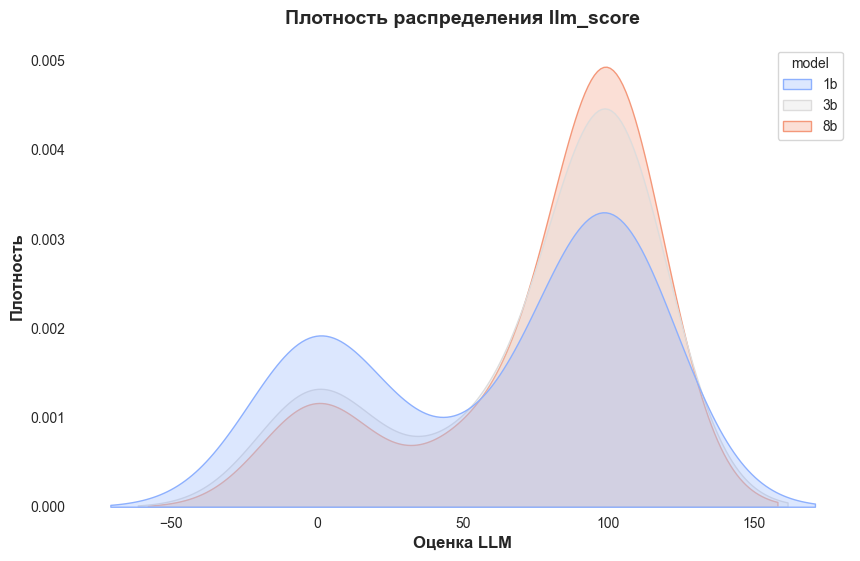

In [60]:
plt.figure(figsize=(10, 6))
sns.set_style("white")

ax = sns.kdeplot(
    data=all_results, 
    x="llm_score", 
    hue="model",
    palette="coolwarm", 
    fill=True,
    alpha=0.3
)

ax.set_xlabel("Оценка LLM", fontsize=12, fontweight='bold')
ax.set_ylabel("Плотность", fontsize=12, fontweight='bold')
ax.set_title("Плотность распределения llm_score", fontsize=14, fontweight='bold', pad=15)

sns.despine(left=True, bottom=True)
plt.show()

Из этого графика мы видим, что оценка 0 у 8b встречаются реже, а оценка 100 бывает чаще, однако разрыв между версией 3b и 8b не такой большой

# Проверка на тестовом датасете

In [ ]:
TEST_DF = pd.read_pickle('../data/control_questions')

result_models = {}

for model in model_examples.keys():
    model_examples[model].df = TEST_DF
    result_models[model] = model_examples[model].test(**model_examples[model].study.best_params)

In [28]:
print(f'{result_models['llama-3.2-1b-instruct'].score:.2f}')
result_models['llama-3.2-1b-instruct'].result

32.08


,Контекст,Файл,Вопрос,Правильный ответ,top_files,top_chunks,Ответ,file_score,context_score,llm_score
0,Изумрудный Будда — выполненная из жадеита и ук...,2442660.txt,Где был обнаружен изумрудный Будда?,Чианграе,"[158957.txt, 3777860.txt, 33616.txt, 2442660.txt]",[Изумрудный Будда — выполненная из жадеита и у...,"В Чианграе, в 1436 году.",1,96,100.00
1,Пьяцца деи Мираколи (итал. Piazza dei Miracoli...,3777860.txt,Как переводится Пьяцца-деи-Мираколи?,Площадь чудес,"[2431404.txt, 3777860.txt, 249892.txt]",[Пьяцца-деи-Мираколи (итал. Piazza dei Miracol...,Пьяцца-деи-Мираколи переводится как «площадь ч...,1,95,100.00
2,«Material Girl» (англ. Меркантильная девушка) ...,1507890.txt,Где проводились съемки видеоклипа на песню Mat...,"Студия Ren-Мар Studios в Голливуде, штат Калиф...","[249892.txt, 1507890.txt]",[== Музыкальное видео ==\nВидеоклип на песню б...,Видеоклип на песню Material Girl был снят в ст...,1,91,87.50
3,Родился 22 июля 1983 года в Москве. Отец — Але...,249892.txt,Сколько по времени записывался альбом Здесь и ...,Два года,[249892.txt],[=== 2002—2004: альбом «Detsl a.k.a. Le Truk» ...,2008 год.,1,97,33.33
4,Contra (яп. 魂斗羅 Мятежник) — серия японских ком...,1767244.txt,Где разворачивается сюжет Contra?,Земля,"[2431404.txt, 1767244.txt]",[Contra (яп. 魂斗羅 Мятежник) — серия японских ко...,XXVII век.,1,100,0.00
5,В СССР восстание Спартака рассматривалось как ...,2431404.txt,Какое по счету было восстание рабов Спартака?,Третье,[2431404.txt],[Восставшие захватили лагерь Гая Торания. В ре...,Восстание рабов Спартака было первой в истории...,1,100,0.00
6,Квалификация к чемпионату мира продолжалась с ...,347846.txt,Сколько всего было стадионов в заявке во время...,10,[347846.txt],[Чемпионат мира по футболу 1998 (фр. Coupe du...,32.,1,93,0.00
7,"Брянск — город в России, административный цент...",26342.txt,Как впервые упоминается Брянск?,Дебрянск,[26342.txt],"[Брянск — город областного значения в России, ...",Ипатьевская летопись.,1,78,0.00
8,Леонардо да Винчи родился 15 апреля 1452 года ...,33616.txt,"Кому принадлежала мастерская, где Леонардо Да ...",Верроккьо,[33616.txt],[=== Мастерская Верроккьо ===\nВ 1466 году Лео...,В Mastreśura Verrocckio.,1,27,0.00
9,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"Количество лет, проведенных в тюрьме за убийст...",Один год,"[33616.txt, 249892.txt, 26342.txt, 158957.txt]",[== Пенитенциарные учреждения ==\nВ границах г...,1800.,1,0,0.00


In [29]:
print(f'{result_models['llama-3.2-3b-instruct'].score:.2f}')
result_models['llama-3.2-3b-instruct'].result

61.67


,Контекст,Файл,Вопрос,Правильный ответ,top_files,top_chunks,Ответ,file_score,context_score,llm_score
0,Contra (яп. 魂斗羅 Мятежник) — серия японских ком...,1767244.txt,Где разворачивается сюжет Contra?,Земля,"[249892.txt, 2431404.txt, 1767244.txt]",[Contra (яп. 魂斗羅 Мятежник) — серия японских ко...,Сюжет Contra разворачивается на планете Земля ...,1,100,100.00
1,Пьяцца деи Мираколи (итал. Piazza dei Miracoli...,3777860.txt,Как переводится Пьяцца-деи-Мираколи?,Площадь чудес,"[33616.txt, 2431404.txt, 3777860.txt, 249892.txt]",[Пьяцца-деи-Мираколи (итал. Piazza dei Miracol...,Площадь чудес.,1,95,100.00
2,Квалификация к чемпионату мира продолжалась с ...,347846.txt,Сколько всего было стадионов в заявке во время...,10,[347846.txt],[== Инновации ==\n\n\n=== Новые технологии ===...,В заявке на проведение чемпионата мира вошли 1...,1,95,100.00
3,«Material Girl» (англ. Меркантильная девушка) ...,1507890.txt,Где проводились съемки видеоклипа на песню Mat...,"Студия Ren-Мар Studios в Голливуде, штат Калиф...","[249892.txt, 1507890.txt]",[== Музыкальное видео ==\nВидеоклип на песню б...,Съёмки видеоклипа проходили в студии Ren-Мар S...,1,91,100.00
4,Леонардо да Винчи родился 15 апреля 1452 года ...,33616.txt,"Кому принадлежала мастерская, где Леонардо Да ...",Верроккьо,[33616.txt],[=== Мастерская Верроккьо ===\nВ 1466 году Лео...,"Мастерской, где Леонардо Да Винчи был подмасте...",1,26,100.00
5,Родился 22 июля 1983 года в Москве. Отец — Але...,249892.txt,Сколько по времени записывался альбом Здесь и ...,Два года,[249892.txt],[=== 2008 — альбом MosVegas 2012 ===\nПопытка ...,Происходил два года.,1,97,66.67
6,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"Количество лет, проведенных в тюрьме за убийст...",Один год,"[249892.txt, 26342.txt, 158957.txt, 2431404.tx...",[Исправительная колония строгого режима № 2 на...,Нет. Борман был приговорен к году тюремного за...,1,0,50.00
7,Изумрудный Будда — выполненная из жадеита и ук...,2442660.txt,Где был обнаружен изумрудный Будда?,Чианграе,"[158957.txt, 3777860.txt, 33616.txt, 2442660.txt]",[Изумрудный Будда — выполненная из жадеита и у...,Из Чиангра.,1,96,0.00
8,"Брянск — город в России, административный цент...",26342.txt,Как впервые упоминается Брянск?,Дебрянск,[26342.txt],"[Брянск — город областного значения в России, ...",В Ипатьевской летописи.,1,78,0.00
9,В СССР восстание Спартака рассматривалось как ...,2431404.txt,Какое по счету было восстание рабов Спартака?,Третье,[2431404.txt],[== Историография ==\nВосстание Спартака снача...,Восстание рабов Спартака было вторым по счету.,1,29,0.00


In [33]:
print(f'{result_models['llama-3.2-8b-instruct'].score:.2f}')
result_models['llama-3.2-8b-instruct'].result

81.67


,Контекст,Файл,Вопрос,Правильный ответ,top_files,top_chunks,Ответ,file_score,context_score,llm_score
0,Изумрудный Будда — выполненная из жадеита и ук...,2442660.txt,Где был обнаружен изумрудный Будда?,Чианграе,"[158957.txt, 3777860.txt, 33616.txt, 2442660.txt]","[где оставалась до 1779 года, когда Рама I пер...","Известно, что Изумрудный Будда была обнаружена...",1,96,100.00
1,Пьяцца деи Мираколи (итал. Piazza dei Miracoli...,3777860.txt,Как переводится Пьяцца-деи-Мираколи?,Площадь чудес,"[249892.txt, 2431404.txt, 3777860.txt, 33616.txt]",[Пьяцца-деи-Мираколи (итал. Piazza dei Miracol...,"""Площадь чудес"".",1,95,100.00
2,«Material Girl» (англ. Меркантильная девушка) ...,1507890.txt,Где проводились съемки видеоклипа на песню Mat...,"Студия Ren-Мар Studios в Голливуде, штат Калиф...","[249892.txt, 1507890.txt]",[Съёмки видеоклипа проходили с 10 по 11 января...,Съёмки видеоклипа проходили на студии Ren-Мар ...,1,91,100.00
3,"Брянск — город в России, административный цент...",26342.txt,Как впервые упоминается Брянск?,Дебрянск,[26342.txt],[Впервые город упоминается в Ипатьевской летоп...,В Ипатьевской летописи под 1146 годом как Дебр...,1,78,100.00
4,Contra (яп. 魂斗羅 Мятежник) — серия японских ком...,1767244.txt,Где разворачивается сюжет Contra?,Земля,"[33616.txt, 158957.txt, 1767244.txt]",[== Игровой процесс ==\nContra существенно пов...,Сюжет Contra и некоторых её продолжений развор...,1,22,100.00
5,Леонардо да Винчи родился 15 апреля 1452 года ...,33616.txt,"Кому принадлежала мастерская, где Леонардо Да ...",Верроккьо,[33616.txt],[=== Мастерская Верроккьо ===\nВ 1466 году Лео...,Мастерская Верроккьо.,1,18,100.00
6,В СССР восстание Спартака рассматривалось как ...,2431404.txt,Какое по счету было восстание рабов Спартака?,Третье,[2431404.txt],[== Историография ==\nВосстание Спартака снача...,Восстание Спартака было третьим по счёту (посл...,1,16,100.00
7,Родился 22 июля 1983 года в Москве. Отец — Але...,249892.txt,Сколько по времени записывался альбом Здесь и ...,Два года,[249892.txt],[Попытка перехода на псевдоним Le Truk оказала...,"Проект ""Здесь и сейчас"" записывался два года.",1,13,66.67
8,"Юрий Визбор («Семнадцать мгновений весны», ССС...",158957.txt,"Количество лет, проведенных в тюрьме за убийст...",Один год,"[249892.txt, 158957.txt, 2431404.txt, 26342.txt]",[найдётся ни одного человека с преступными нам...,"Нет, Борман провел почти год в тюрьме за соуча...",1,0,50.00
9,Квалификация к чемпионату мира продолжалась с ...,347846.txt,Сколько всего было стадионов в заявке во время...,10,[347846.txt],[== Ссылки ==\n\nЧемпионат мира 1998 на сайте ...,В заявке на проведение чемпионата мира по футб...,1,22,0.00
